In [1]:
import pandas as pd
import matplotlib.pyplot
from datetime import datetime
import numpy as np

energy_data = pd.read_csv('EnergyData201812.csv')

energy_data.head()

##import data

,id,intervalPeriod,parameterCode,supplyType,startTime,endTime,date,dateend,value
0,75,ThirtyMinutes,ActiveEnergyImport,Electricity,17/08/2018 21:30,17/08/2018 22:00,17/08/2018,17/08/2018,0.077
1,75,ThirtyMinutes,ActiveEnergyImport,Electricity,17/08/2018 22:00,17/08/2018 22:30,17/08/2018,17/08/2018,0.057
2,75,ThirtyMinutes,ActiveEnergyImport,Electricity,17/08/2018 19:30,17/08/2018 20:00,17/08/2018,17/08/2018,0.306
3,75,ThirtyMinutes,ActiveEnergyImport,Electricity,17/08/2018 11:30,17/08/2018 12:00,17/08/2018,17/08/2018,0.167
4,75,ThirtyMinutes,ActiveEnergyImport,Electricity,17/08/2018 08:30,17/08/2018 09:00,17/08/2018,17/08/2018,0.167


In [18]:
energy_data['startTime'] = pd.to_datetime(energy_data['startTime'])
energy_data['endTime'] = pd.to_datetime(energy_data['endTime'])

energy_data['startDate'] = energy_data.startTime.dt.date
energy_data['endDate'] = energy_data.endTime.dt.date

energy_data['length'] = energy_data['endTime'] - energy_data['startTime']
energy_data.head()

##convert columns to date, to enable profiling by date

energy_data.describe()

,id,value,length
count,172080.000000,172076.000000,172080
mean,437.170990,0.241486,0 days 01:52:45.188284
std,315.417568,0.419017,5 days 20:23:19.965001
min,2.000000,0.000000,-205 days +00:30:00
25%,123.000000,0.064000,0 days 00:30:00
50%,399.000000,0.124000,0 days 00:30:00
75%,712.000000,0.251000,0 days 00:30:00
max,996.000000,7.540000,30 days 00:30:00


In [23]:
energy_days = energy_data.groupby('id',as_index=False).agg({"date":"nunique"})
                                   
energy_days

##all boilers used on every day

,id,date
0,2,60
1,3,60
2,5,60
3,6,60
4,12,60
5,41,60
6,58,60
7,75,60
8,79,60
9,97,60


In [3]:
energy_group = energy_data.groupby('id',as_index=False).agg({"value":"sum"})
                                   
energy_group

##aggregate total energy used to boiler id level

,id,value
0,2,707.386
1,3,540.545
2,5,1073.338
3,6,555.186
4,12,148.261
5,41,778.171
6,58,451.930
7,75,332.224
8,79,520.360
9,97,931.515


In [4]:
energy_group.describe()

#  average skewed by outliers e.g over 2000
#  median better may to profile

,id,value
count,57.000000,57.000000
mean,448.245614,729.016228
std,318.297944,520.898131
min,2.000000,115.230000
25%,132.000000,393.793000
50%,503.000000,611.161000
75%,712.000000,931.515000
max,996.000000,3032.498000


In [5]:
energy_days = energy_data.groupby('id',as_index=False).agg({"startDate":"nunique"})

energy_days.describe()

# easy way to check if date was signficant, as all boilers used on every day, decided it wasn't

,id,startDate
count,57.000000,57.0
mean,448.245614,60.0
std,318.297944,0.0
min,2.000000,60.0
25%,132.000000,60.0
50%,503.000000,60.0
75%,712.000000,60.0
max,996.000000,60.0


In [6]:
energy_count = energy_data.groupby('id',as_index=False).agg({"value":"count"})

energy_count.head()

##aggregate number of periods the boiler was used for 

,id,value
0,2,2880
1,3,2976
2,5,2880
3,6,2880
4,12,2928


In [7]:
energy_count.columns=["id", "entries"]

energy_count.head()

energy_count.describe()

# convert back to simple data frame to join later
#few outliers, but skew average, so will use median amount

,id,entries
count,57.000000,57.000000
mean,448.245614,3018.877193
std,318.297944,765.365437
min,2.000000,2878.000000
25%,132.000000,2880.000000
50%,503.000000,2928.000000
75%,712.000000,2928.000000
max,996.000000,8688.000000


In [8]:
energy_spread = energy_data.groupby('id',as_index=False).agg({"value":"std"})

energy_spread.columns= ["id", "spread"]

energy_spread.head()

energy_spread.describe()

# using standard deviation for spread, and will use the average to determine how uniform energy use is for each boiler compared to the average of the set
# again, creating simple dataframe to join later

,id,spread
count,57.000000,57.000000
mean,448.245614,0.313851
std,318.297944,0.231354
min,2.000000,0.020719
25%,132.000000,0.155268
50%,503.000000,0.238211
75%,712.000000,0.402043
max,996.000000,1.264510


In [9]:
energy_id_1 = pd.merge(energy_group, energy_count, on = ['id'], how = 'inner')

energy_id_1.head()

#first join total value and number of entries

,id,value,entries
0,2,707.386,2880
1,3,540.545,2976
2,5,1073.338,2880
3,6,555.186,2880
4,12,148.261,2928


In [10]:
energy_id = pd.merge(energy_id_1, energy_spread, on = ['id'], how = 'inner')

energy_id.head()

#then join on spread measure to create final table

,id,value,entries,spread
0,2,707.386,2880,0.500247
1,3,540.545,2976,0.334762
2,5,1073.338,2880,0.354211
3,6,555.186,2880,0.321469
4,12,148.261,2928,0.081140


In [11]:
energy_id.loc[energy_id.value < energy_id.value.median(), 'volume'] = 'Low'
energy_id.loc[energy_id.value >= energy_id.value.median(), 'volume'] = 'High'
energy_id.head()

# determine which boilers have total use compared to median, to begin categorisation

,id,value,entries,spread,volume
0,2,707.386,2880,0.500247,High
1,3,540.545,2976,0.334762,Low
2,5,1073.338,2880,0.354211,High
3,6,555.186,2880,0.321469,Low
4,12,148.261,2928,0.081140,Low


In [12]:
energy_id.loc[energy_id.entries < energy_id.entries.median(), 'Frequency'] = 'Low'
energy_id.loc[energy_id.entries >= energy_id.entries.median(), 'Frequency'] = 'High'

energy_id.head()

# determine frequency of boiler use related to median, for categorisation

,id,value,entries,spread,volume,Frequency
0,2,707.386,2880,0.500247,High,Low
1,3,540.545,2976,0.334762,Low,High
2,5,1073.338,2880,0.354211,High,Low
3,6,555.186,2880,0.321469,Low,Low
4,12,148.261,2928,0.081140,Low,High


In [13]:
energy_id.loc[energy_id.spread < energy_id.spread.mean(), 'Variation'] = 'Low'
energy_id.loc[energy_id.spread >= energy_id.spread.mean(), 'Variation'] = 'High'

energy_id.head()


# determine variation of boiler use related to average 

# completes table to summarise categorisaton

,id,value,entries,spread,volume,Frequency,Variation
0,2,707.386,2880,0.500247,High,Low,High
1,3,540.545,2976,0.334762,Low,High,High
2,5,1073.338,2880,0.354211,High,Low,High
3,6,555.186,2880,0.321469,Low,Low,High
4,12,148.261,2928,0.081140,Low,High,Low


In [14]:
energy_id['Category'] = 0

energy_id.loc[(energy_id['volume'] == 'High') & (energy_id['Frequency'] == 'High') & (energy_id['Variation'] == 'High'), 'Category'] = 'High Vol High Freq High Variation'
energy_id.loc[(energy_id['volume'] == 'High') & (energy_id['Frequency'] == 'High') & (energy_id['Variation'] == 'Low'), 'Category'] = 'High Vol High Freq Low Variation'
energy_id.loc[(energy_id['volume'] == 'High') & (energy_id['Frequency'] == 'Low') & (energy_id['Variation'] == 'High'), 'Category'] = 'High Vol Low Freq High Variation'
energy_id.loc[(energy_id['volume'] == 'High') & (energy_id['Frequency'] == 'Low') & (energy_id['Variation'] == 'Low'), 'Category'] = 'High Vol Low Freq Low Variation'
energy_id.loc[(energy_id['volume'] == 'Low') & (energy_id['Frequency'] == 'Low') & (energy_id['Variation'] == 'Low'), 'Category'] = 'Low Vol Low Freq Low Variation'
energy_id.loc[(energy_id['volume'] == 'Low') & (energy_id['Frequency'] == 'Low') & (energy_id['Variation'] == 'High'), 'Category'] = 'Low Vol Low Freq High Variation'
energy_id.loc[(energy_id['volume'] == 'Low') & (energy_id['Frequency'] == 'High') & (energy_id['Variation'] == 'Low'), 'Category'] = 'Low Vol High Freq Low Variation'
energy_id.loc[(energy_id['volume'] == 'Low') & (energy_id['Frequency'] == 'High') & (energy_id['Variation'] == 'High'), 'Category'] = 'Low Vol High Freq High Variation'


energy_id.head(5)    

#identifies key characteristics for each boiler, in terms of quantity, frequency and predictability

,id,value,entries,spread,volume,Frequency,Variation,Category
0,2,707.386,2880,0.500247,High,Low,High,High Vol Low Freq High Variation
1,3,540.545,2976,0.334762,Low,High,High,Low Vol High Freq High Variation
2,5,1073.338,2880,0.354211,High,Low,High,High Vol Low Freq High Variation
3,6,555.186,2880,0.321469,Low,Low,High,Low Vol Low Freq High Variation
4,12,148.261,2928,0.081140,Low,High,Low,Low Vol High Freq Low Variation


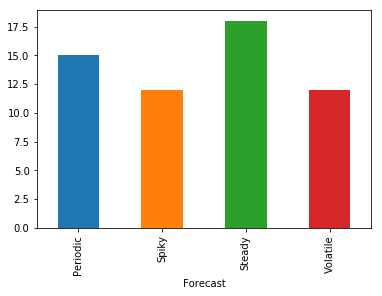

In [17]:
energy_categorised = energy_id[['id','Category']]

energy_categorised.loc[energy_categorised.Category == 'High Vol High Freq High Variation', 'Forecast'] = 'Volatile'
energy_categorised.loc[energy_categorised.Category == 'High Vol High Freq Low Variation', 'Forecast'] = 'Steady'
energy_categorised.loc[energy_categorised.Category == 'High Vol Low Freq High Variation', 'Forecast'] = 'Spiky'
energy_categorised.loc[energy_categorised.Category == 'High Vol Low Freq Low Variation', 'Forecast'] = 'Periodic'
energy_categorised.loc[energy_categorised.Category == 'Low Vol Low Freq Low Variation', 'Forecast'] = 'Periodic'
energy_categorised.loc[energy_categorised.Category == 'Low Vol Low Freq High Variation', 'Forecast'] = 'Spiky'
energy_categorised.loc[energy_categorised.Category == 'Low Vol High Freq Low Variation', 'Forecast'] = 'Steady'
energy_categorised.loc[energy_categorised.Category == 'Low Vol High Freq High Variation', 'Forecast'] = 'Volatile'

# grouping based on ease of forecast
# i.e. easy to predict high, frequent and stable use; difficult to predict high volume low frequency and high variation

energy_categorised.head()

energy_categorised_count = energy_categorised.groupby(['Forecast'])['id'].count()
energy_categorised_count.head()

energy_categorised_count.plot(kind='bar')

##  overall this approach groups the boilers into 4 similar sized groups, determined by how easy the use can be forecast

In [16]:
energy_categorised = energy_categorised[['id','Forecast']]
energy_categorised


# final categorisation

,id,Forecast
0,2,Spiky
1,3,Volatile
2,5,Spiky
3,6,Spiky
4,12,Steady
5,41,Steady
6,58,Spiky
7,75,Periodic
8,79,Steady
9,97,Steady
